**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import style
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from math import sqrt
import time
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None
from statsmodels.api import OLS, add_constant

style.use("ggplot")

In [2]:
#load the dataset

MH_Data= pd.read_csv('depression_data.csv')


In [3]:
MH_Data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [4]:
MH_Data = MH_Data.drop('Name', axis=1)


In [5]:
MH_Data.isnull().sum()

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [6]:
#understanding of the Dataset
MH_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital Status                413768 non-null  object 
 2   Education Level               413768 non-null  object 
 3   Number of Children            413768 non-null  int64  
 4   Smoking Status                413768 non-null  object 
 5   Physical Activity Level       413768 non-null  object 
 6   Employment Status             413768 non-null  object 
 7   Income                        413768 non-null  float64
 8   Alcohol Consumption           413768 non-null  object 
 9   Dietary Habits                413768 non-null  object 
 10  Sleep Patterns                413768 non-null  object 
 11  History of Mental Illness     413768 non-null  object 
 12  History of Substance Abuse    413768 non-nul

In [7]:
MH_Data.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [8]:
MH_Data.duplicated().sum()

0

# EDA


In [9]:
MH_Data.dtypes

Age                               int64
Marital Status                   object
Education Level                  object
Number of Children                int64
Smoking Status                   object
Physical Activity Level          object
Employment Status                object
Income                          float64
Alcohol Consumption              object
Dietary Habits                   object
Sleep Patterns                   object
History of Mental Illness        object
History of Substance Abuse       object
Family History of Depression     object
Chronic Medical Conditions       object
dtype: object

In [10]:
MH_Data['History of Mental Illness'].value_counts()


History of Mental Illness
No     287943
Yes    125825
Name: count, dtype: int64

In [11]:
#categorise age groups 

def categorize_age(Age):
    if Age <= 12:
        return 'Children (0-12 years)'
    elif 13 <= Age <= 19:
        return 'Teen(13-19 years)'
    elif 20 <= Age <= 35:
        return 'Young Adults (20-35 years)'
    elif 36 <= Age <= 55:
        return 'Middle-Aged Adults (36-55 years)'
    elif 56 <= Age <= 75:
        return 'Older Adults (56-75 years)'
    else:
        return 'Elderly/Very Seniors (76+ years)'

# Apply the function to the Age column
MH_Data['Age Group'] = MH_Data['Age'].apply(categorize_age)

In [12]:
def categorize_income_groups_by_GNI(df, gni_column='Income'):

    # Define the bins and labels for categorizing based on GNI per capita
    bins = [0, 1045, 4095, 12695, float('inf')]  
    labels = ['Low-income', 'Lower-middle-income', 'Upper-middle-income', 'High-income']  # Corresponding labels
    
    # Categorize the GNI values using pd.cut
    df['Income Group'] = pd.cut(df[gni_column], bins=bins, labels=labels, right=False)
    
    return df


MH_Data = categorize_income_groups_by_GNI(MH_Data, gni_column='Income')

MH_Data

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Group,Income Group
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,Young Adults (20-35 years),High-income
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,Middle-Aged Adults (36-55 years),High-income
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,Elderly/Very Seniors (76+ years),High-income
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,Older Adults (56-75 years),Upper-middle-income
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,Teen(13-19 years),Upper-middle-income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No,Older Adults (56-75 years),High-income
413764,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes,Young Adults (20-35 years),High-income
413765,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes,Older Adults (56-75 years),High-income
413766,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No,Older Adults (56-75 years),High-income


In [13]:
#seperate categorical variable and numeric variables 
numeric_cols = MH_Data.select_dtypes(include=['number']).columns
categorical_cols = MH_Data.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:")
print(numeric_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numeric Columns:
Index(['Age', 'Number of Children', 'Income'], dtype='object')

Categorical Columns:
Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions', 'Age Group', 'Income Group'],
      dtype='object')


Numeric Columns:
Index(['Age', 'Number of Children', 'Income'], dtype='object')


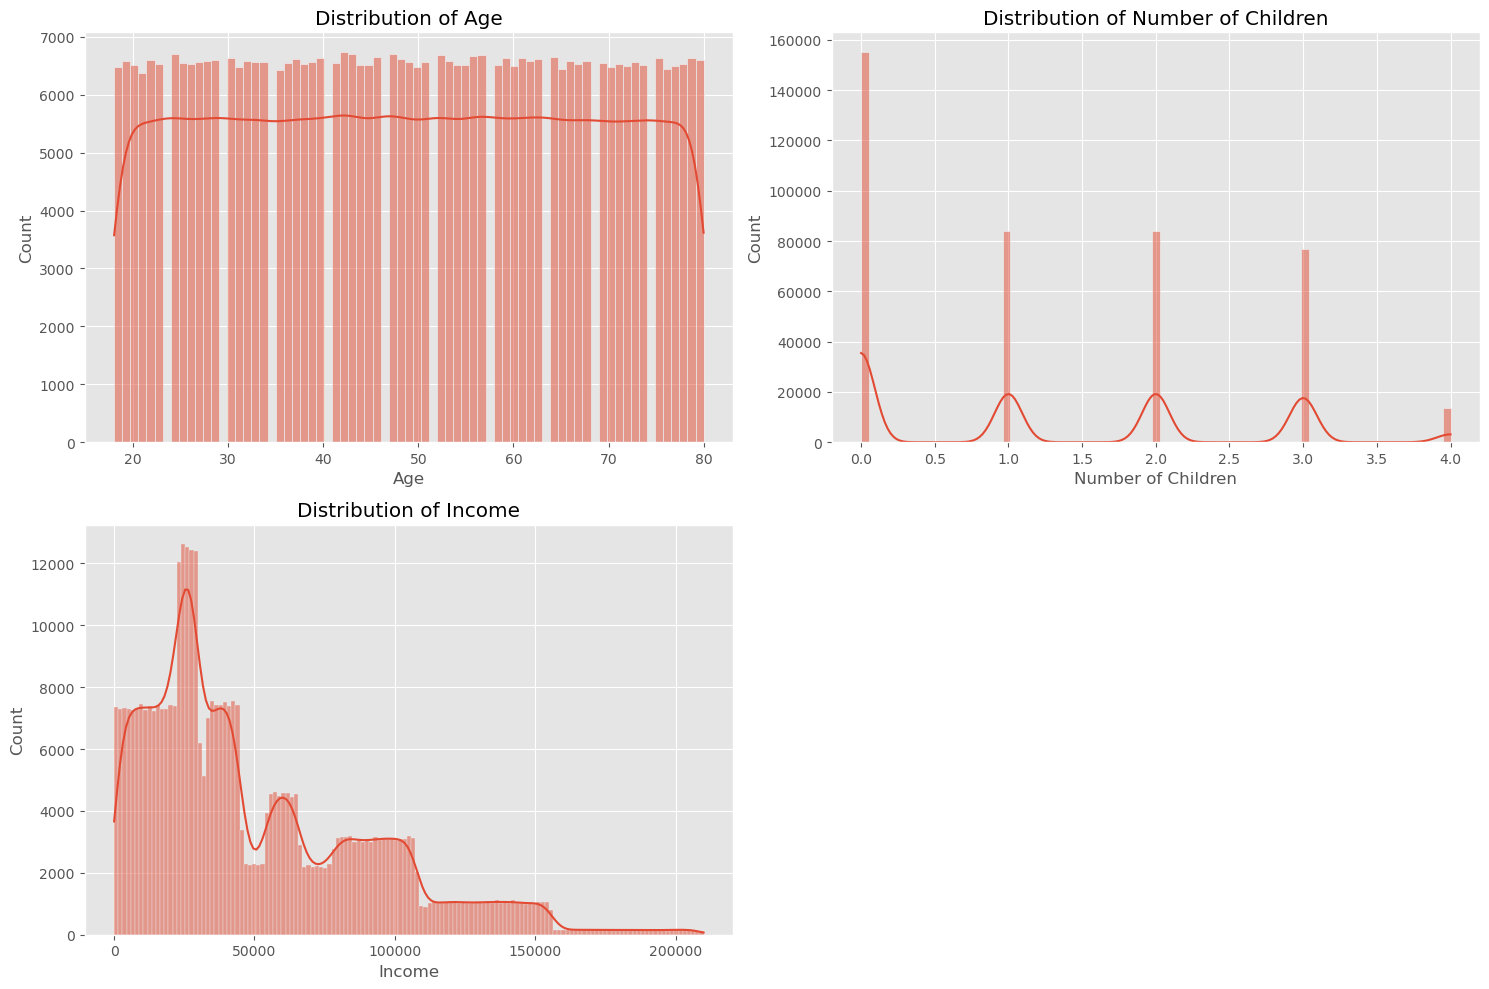

In [14]:
numeric_features = MH_Data.select_dtypes(include=['number']).columns

print("Numeric Columns:")
print(numeric_features)

# Plot numeric features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(2, (len(numeric_features) // 2) + 1, i)
    sns.histplot(MH_Data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()



In [15]:
categorical_features = MH_Data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Columns:")
print(categorical_features)




Categorical Columns:
Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions', 'Age Group', 'Income Group'],
      dtype='object')


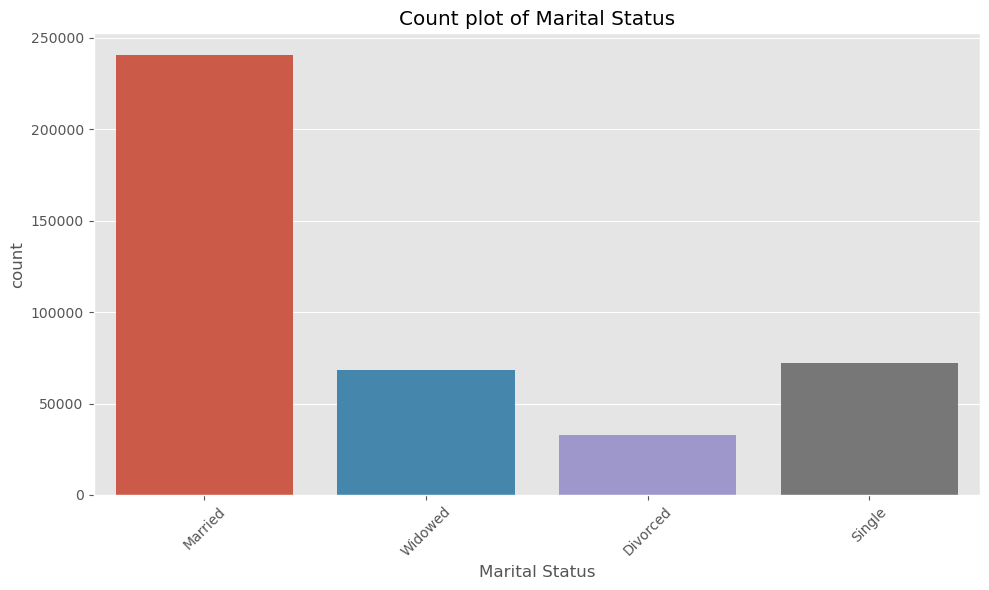

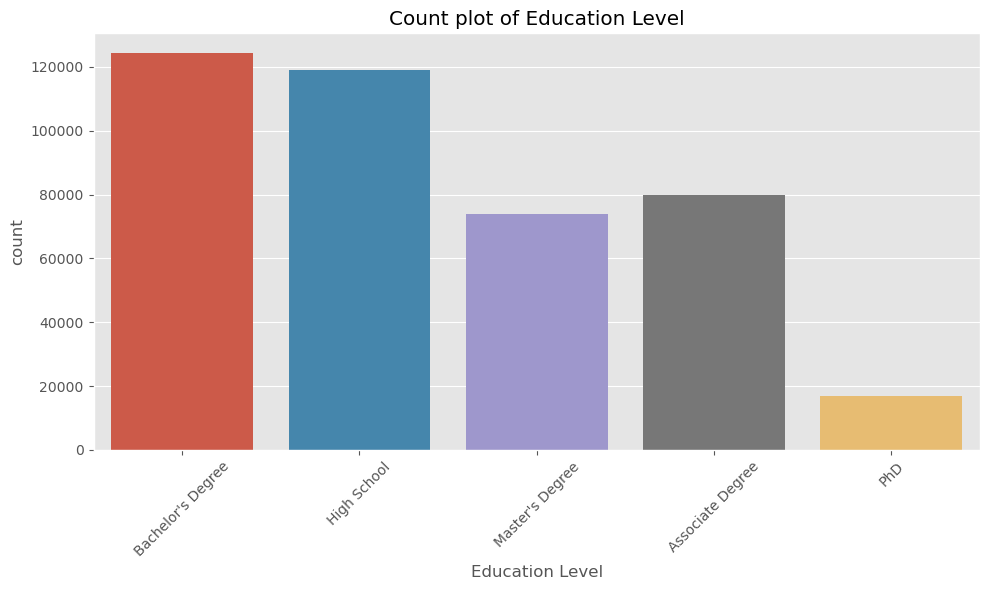

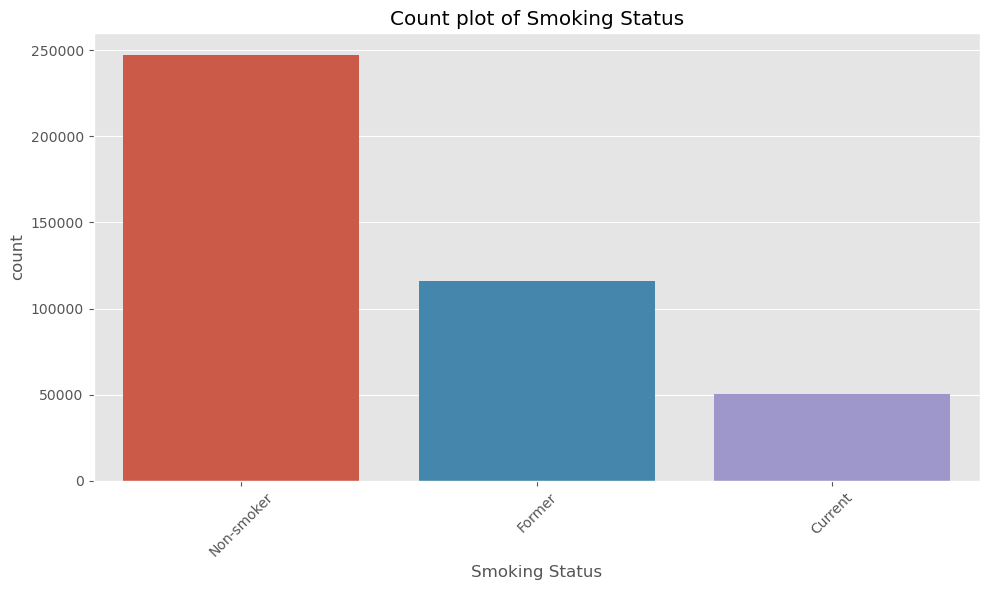

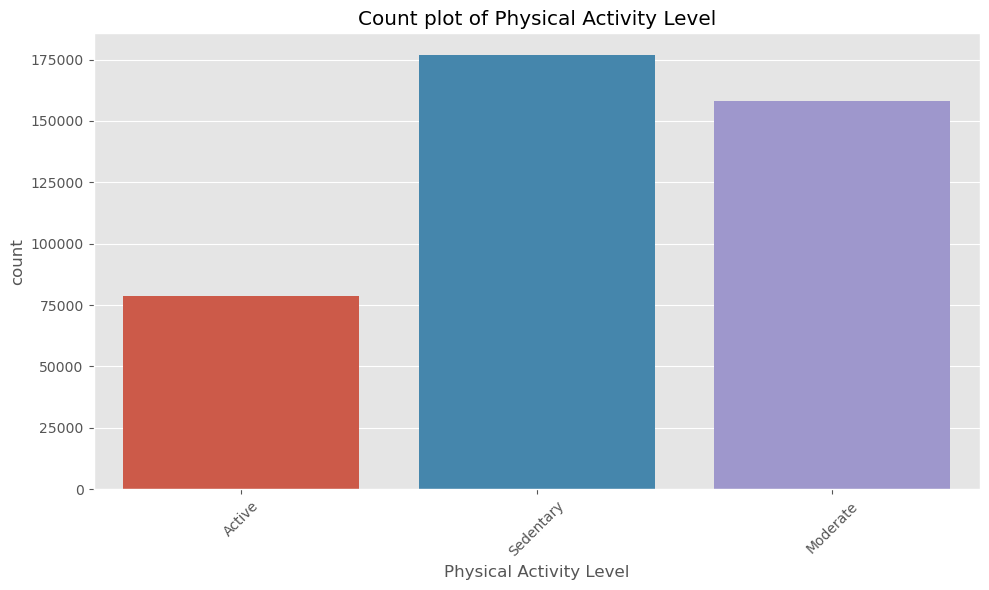

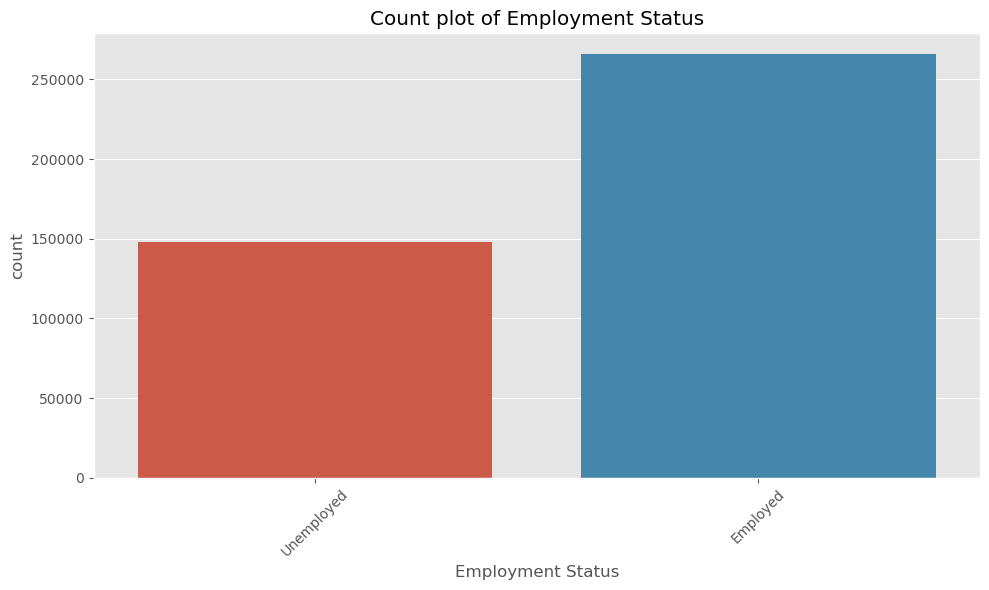

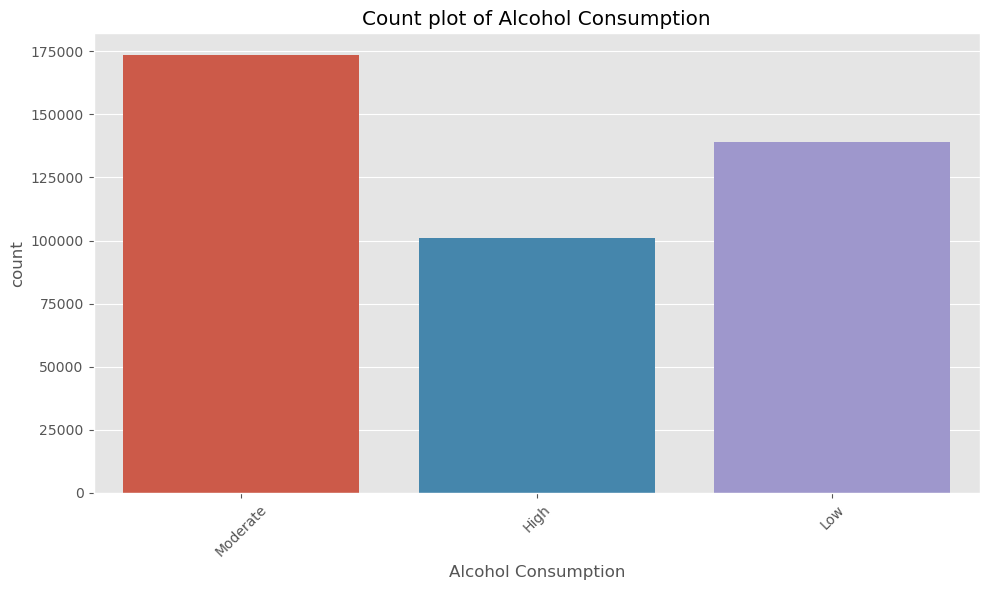

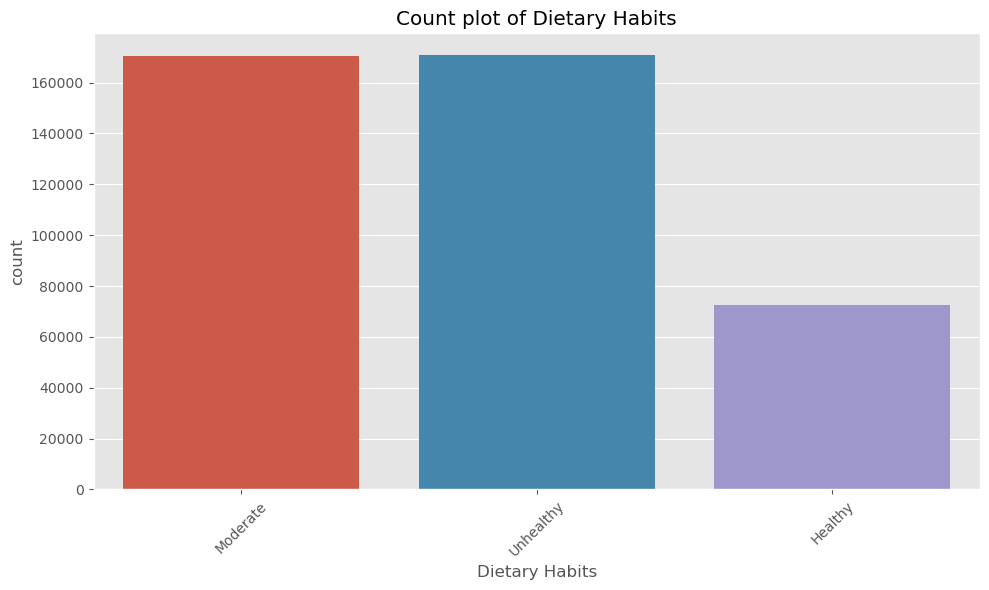

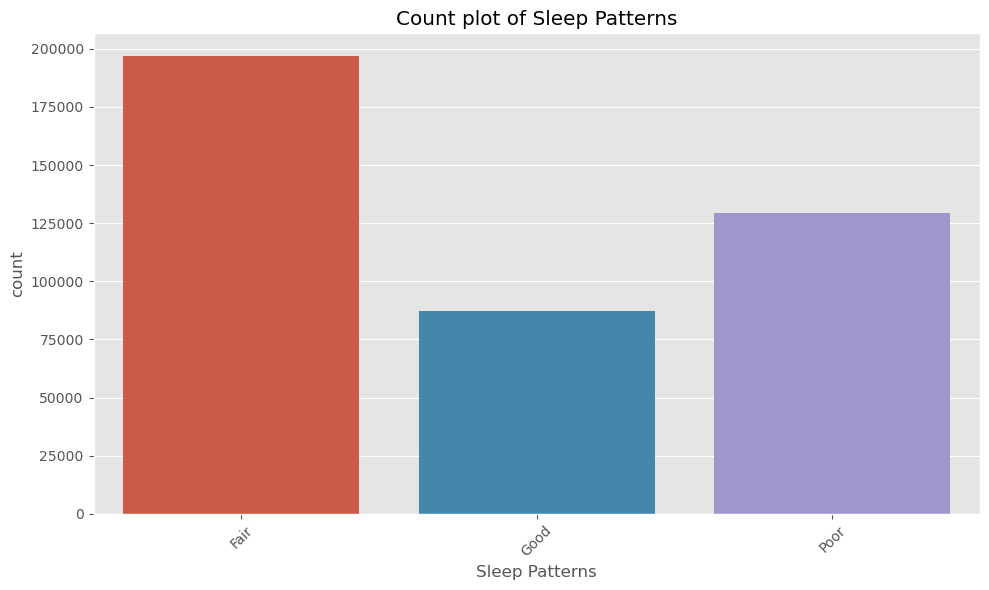

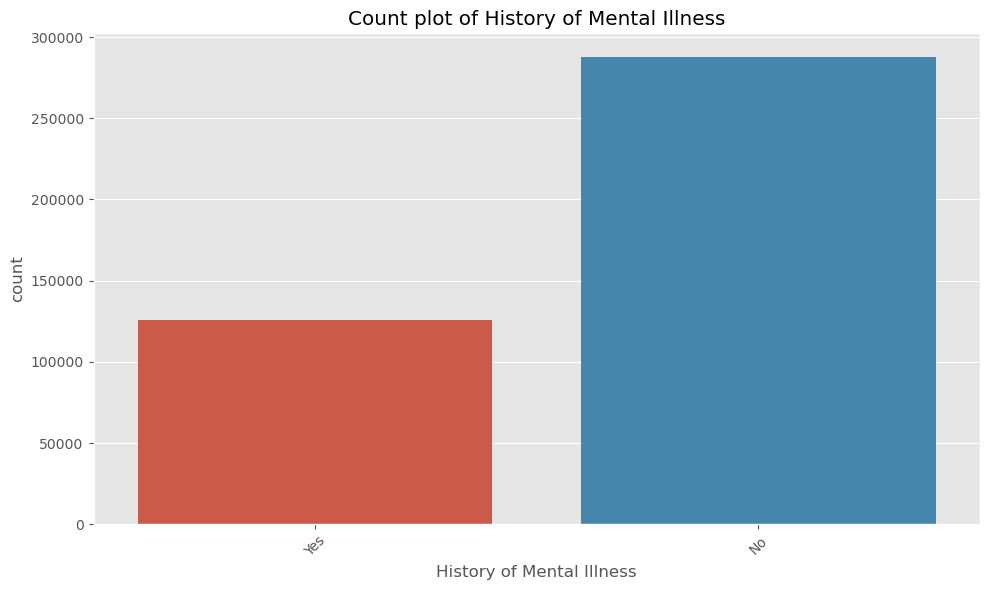

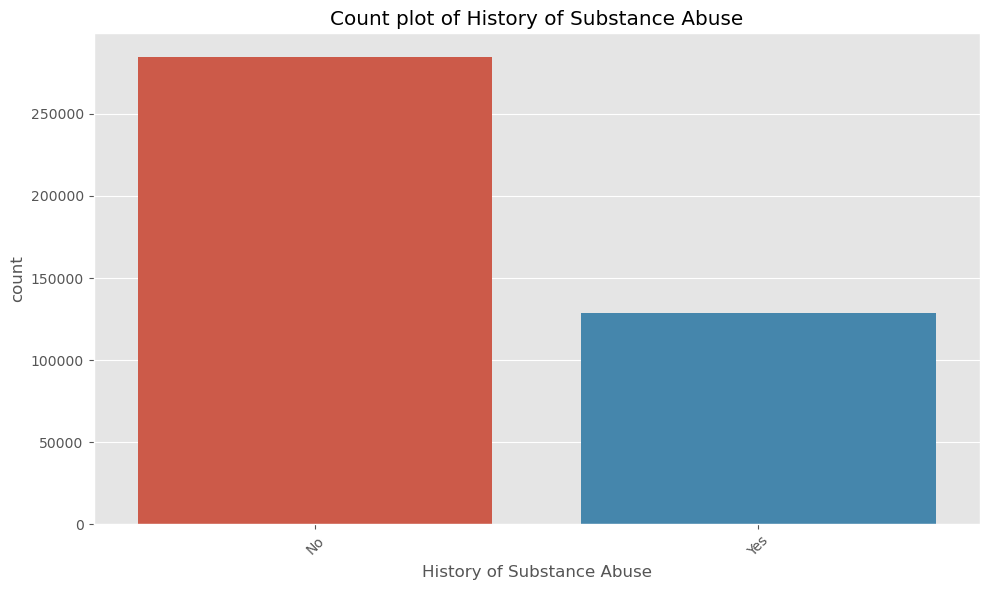

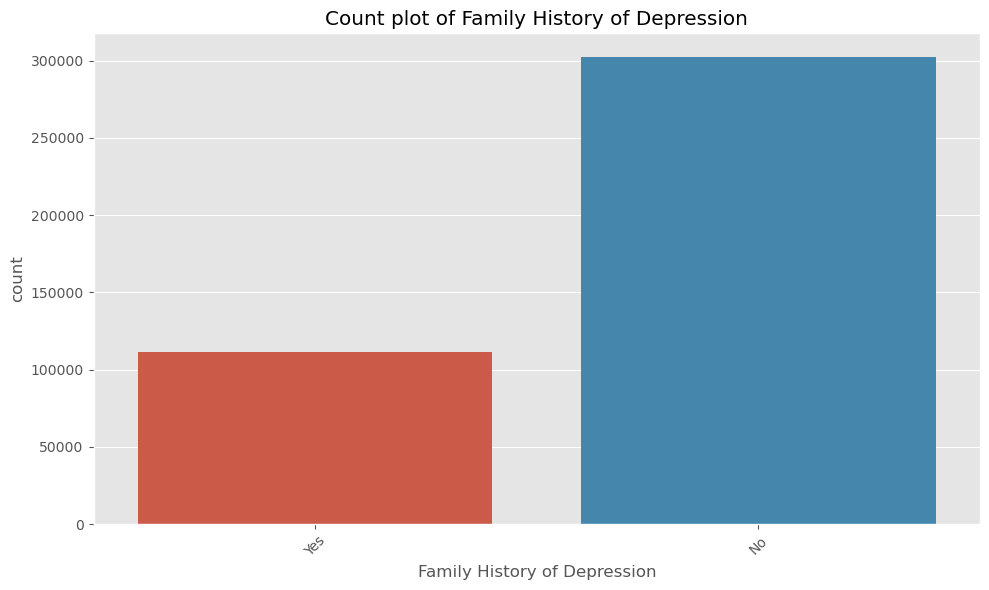

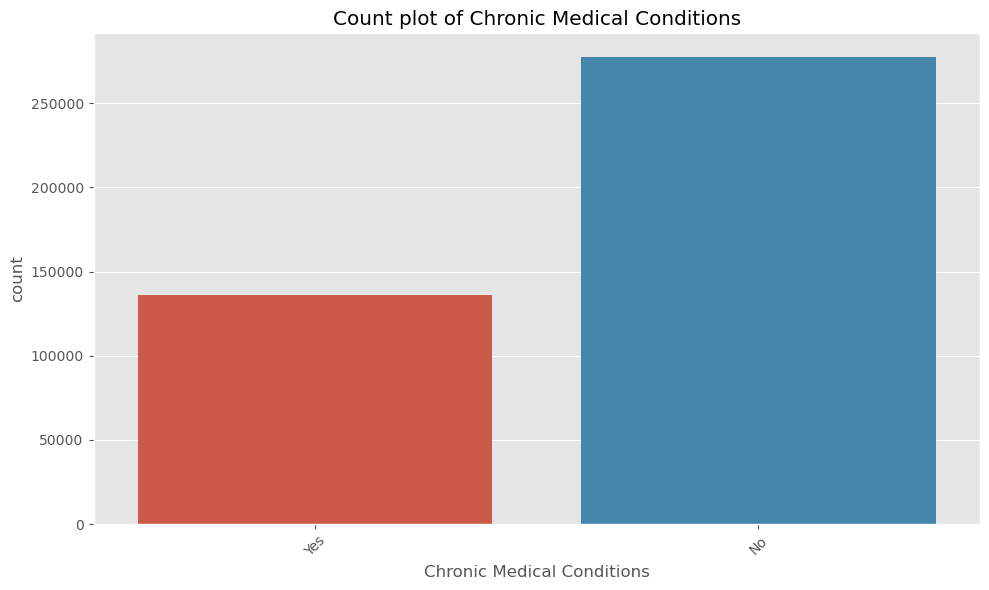

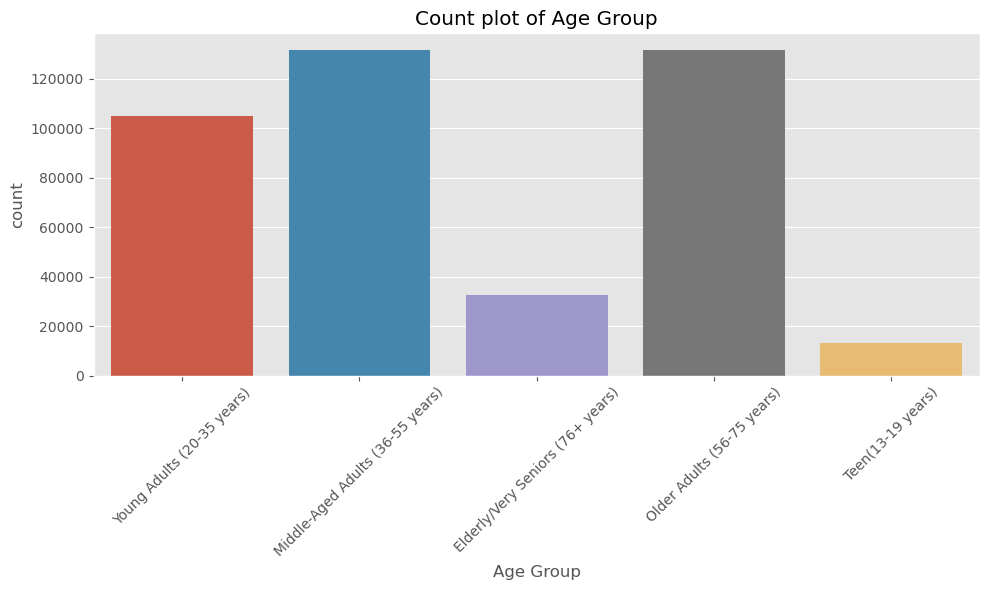

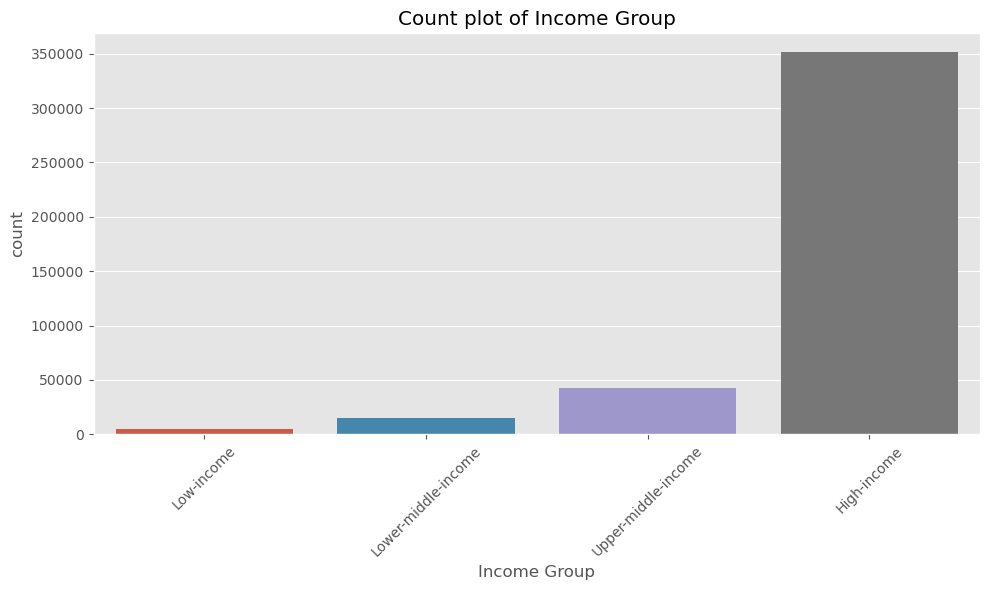

In [16]:
for column in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=MH_Data)
    plt.title(f'Count plot of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Key Takeaways:

- Married individuals and those with Bachelor's Degrees dominate in terms of volume in their respective categories.
- Non-smokers, Sedentary individuals, and those with Moderate Alcohol Consumption are more prevalent.
- In terms of medical and psychological health, the majority have No Substance Abuse, No Depression, and No Chronic Medical Conditions.
- Middle-aged adults represent the largest age group in the dataset, followed by Older Adults.
- High Income households have the greatest representation, with a noticeable proportion in the Upper-middle Income range.

# check relationship between dependent and independent variable

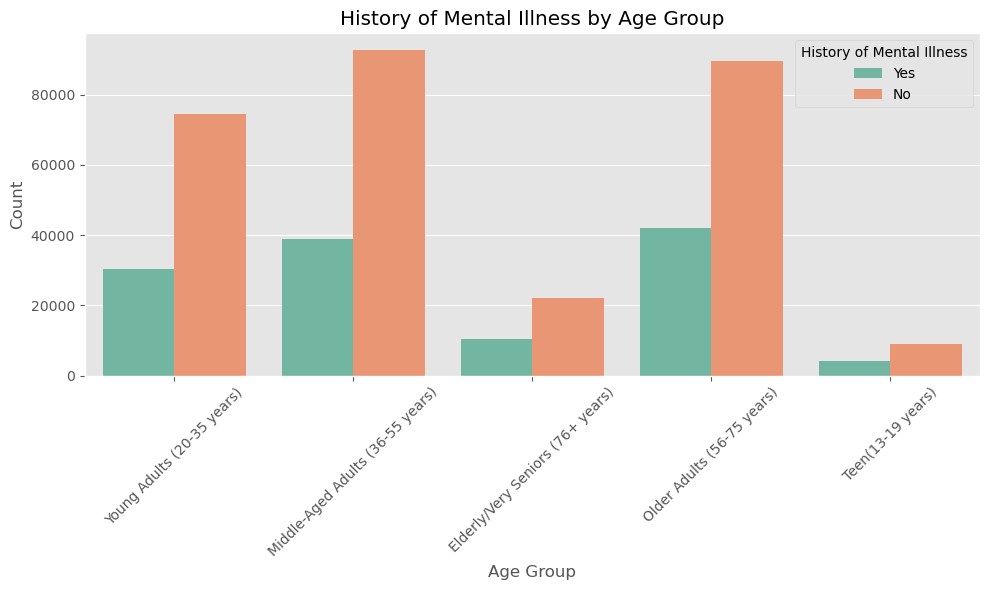

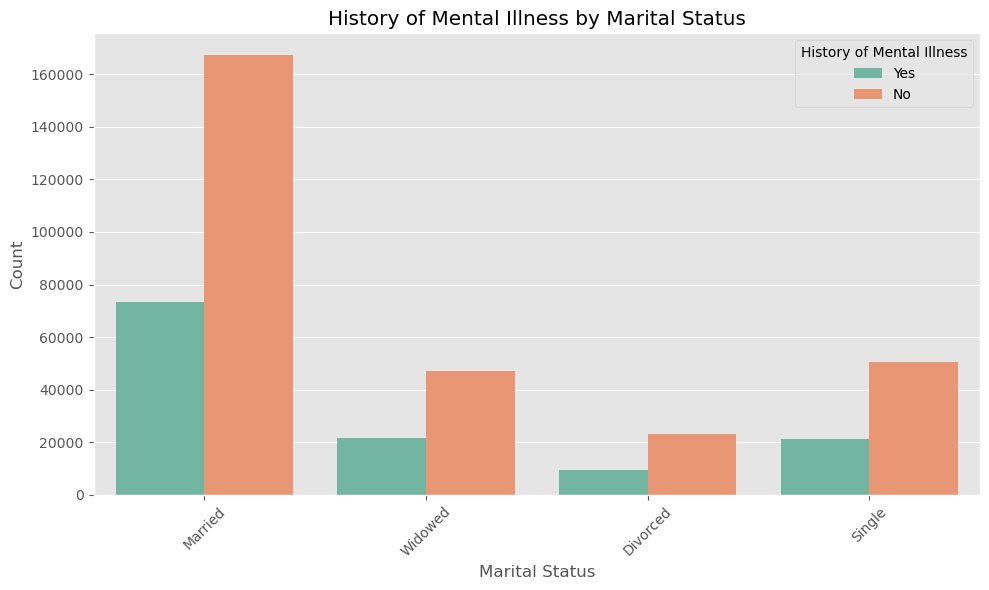

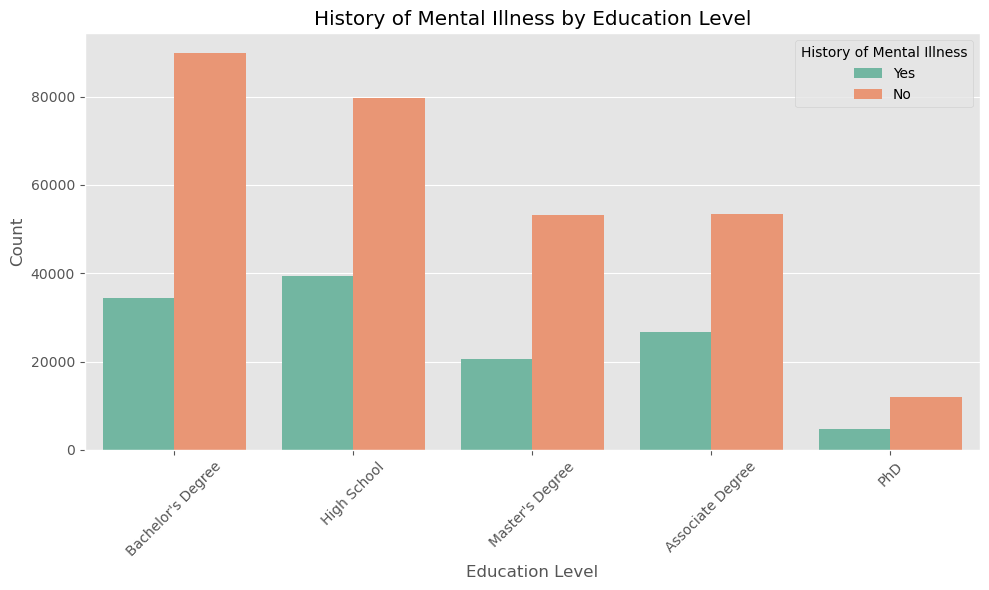

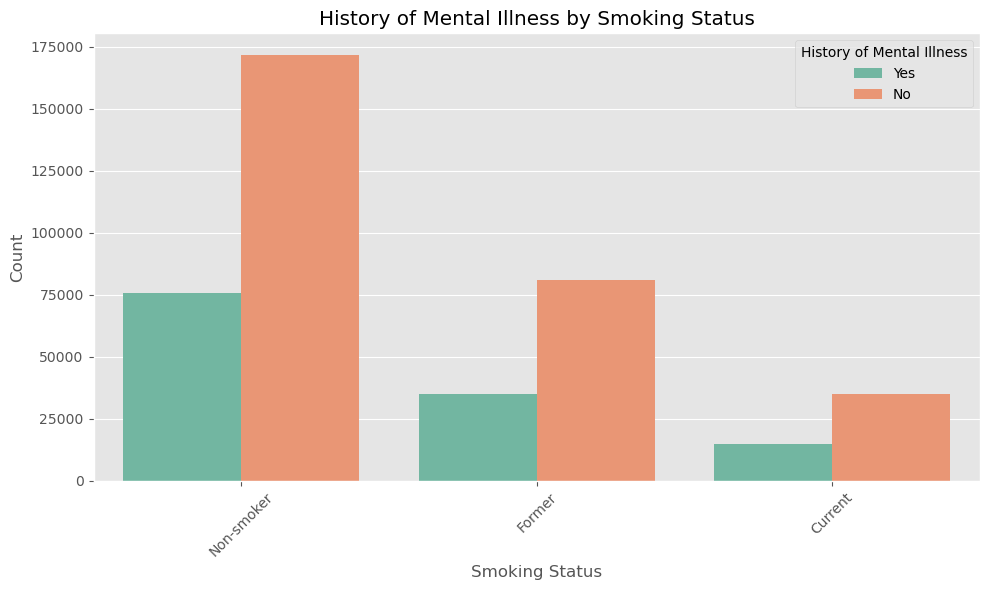

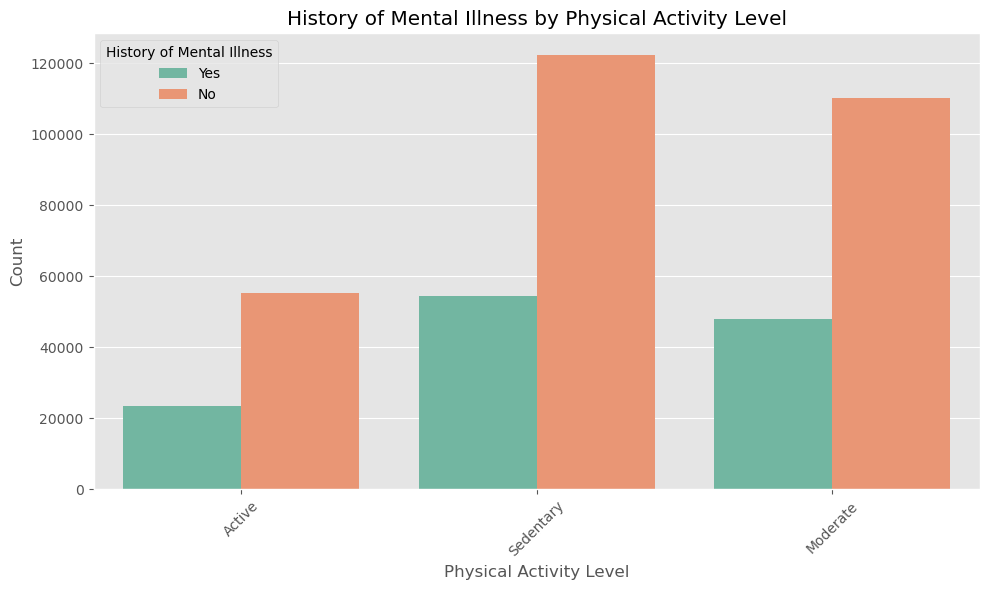

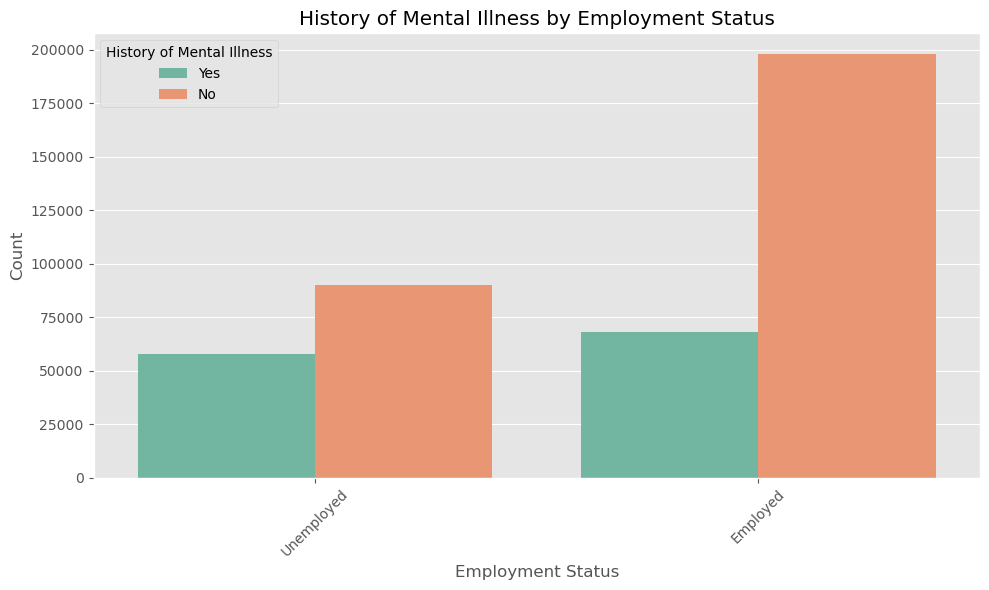

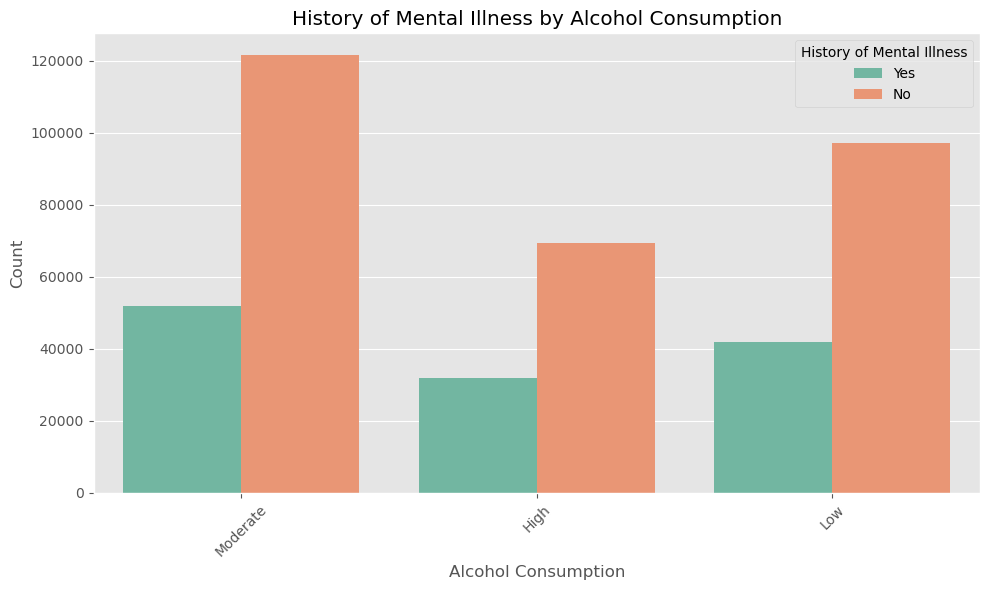

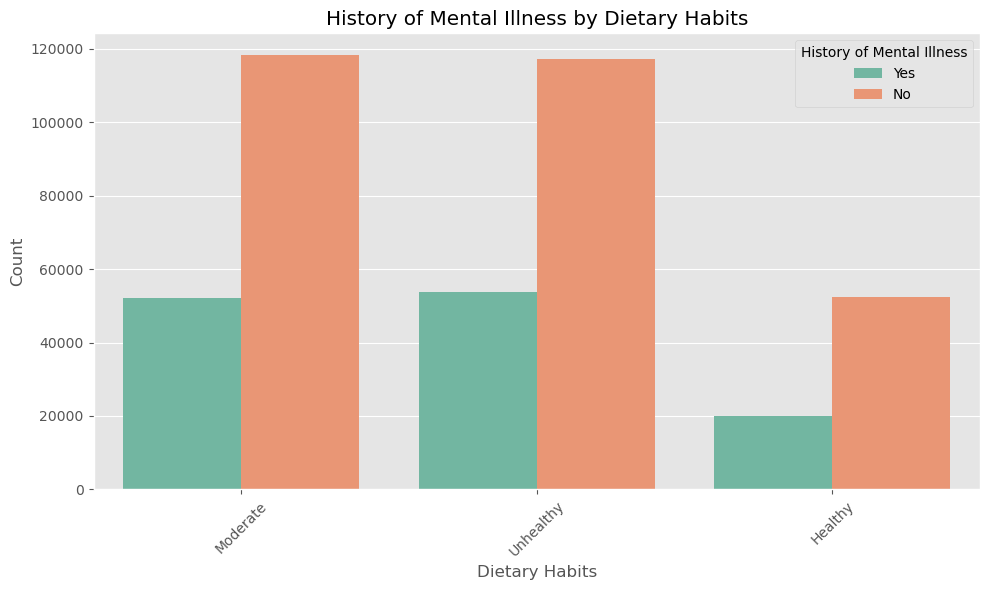

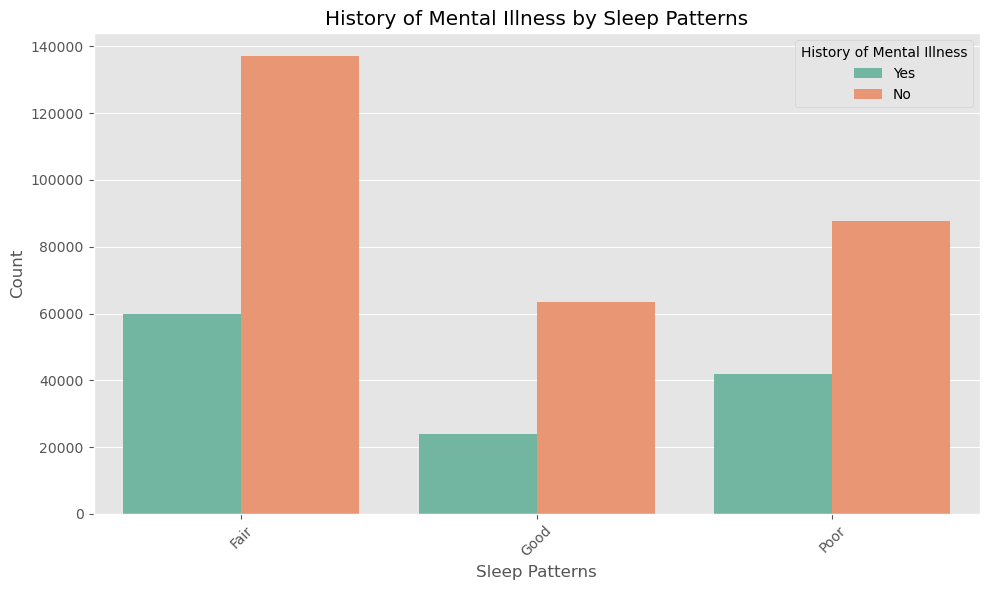

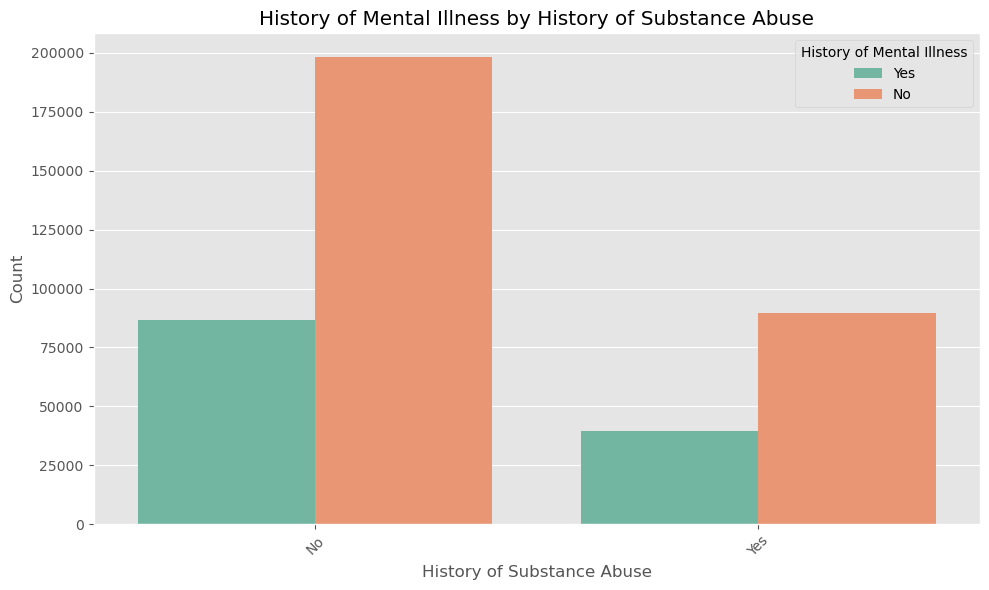

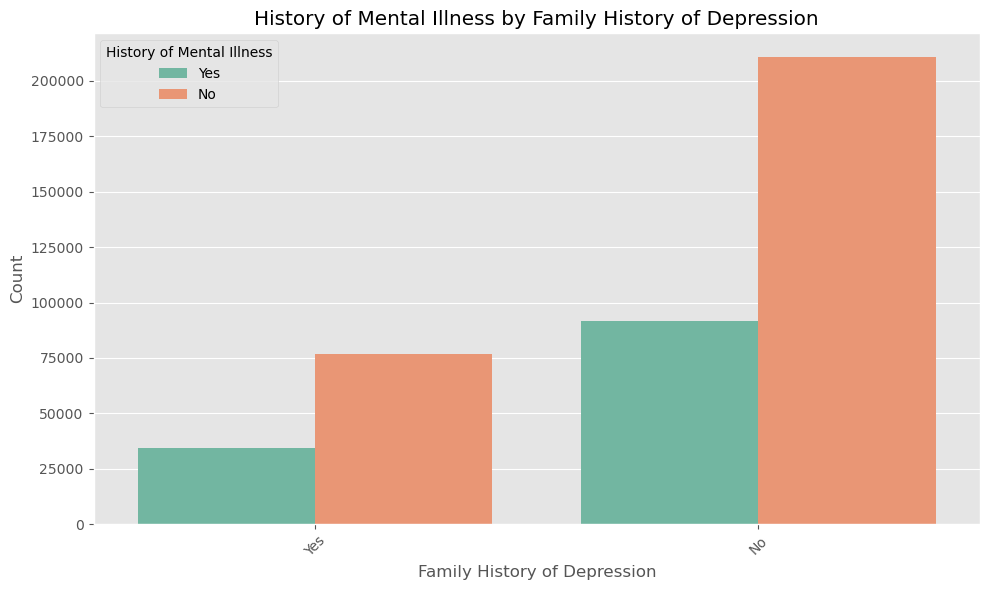

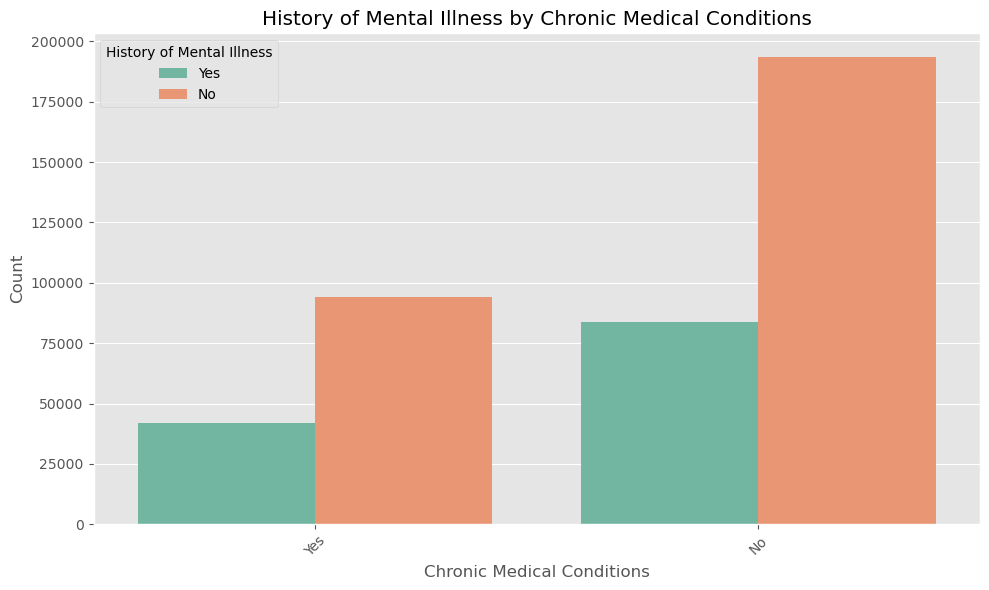

In [17]:

def plot_categorical_distribution(MH_Data, category_col, hue_col):
    """Plots a count plot for the distribution of a categorical variable with a specified hue."""
    plt.figure(figsize=(10, 6))
    
    # Create the count plot
    sns.countplot(x=category_col, hue=hue_col, data=MH_Data, palette='Set2')
    
    # Add title and labels
    plt.title(f'{hue_col} by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel('Count')
    
    # Adjust x labels
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage with MH_Data
df = pd.DataFrame({  # Replace this with your actual DataFrame
    'Age Group': ['18-25', '26-35', '36-45', '46-55', '56-65', '18-25', '26-35'],
    'Alcohol Consumption': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes']
})

plot_categorical_distribution(MH_Data, 'Age Group', 'History of Mental Illness')
plot_categorical_distribution(MH_Data, 'Marital Status', 'History of Mental Illness')
plot_categorical_distribution(MH_Data, 'Education Level', 'History of Mental Illness')
plot_categorical_distribution(MH_Data, 'Smoking Status', 'History of Mental Illness')
plot_categorical_distribution(MH_Data, 'Physical Activity Level', 'History of Mental Illness')

plot_categorical_distribution(MH_Data, 'Employment Status', 'History of Mental Illness')
plot_categorical_distribution(MH_Data,  'Alcohol Consumption', 'History of Mental Illness')
plot_categorical_distribution(MH_Data, 'Dietary Habits', 'History of Mental Illness')
plot_categorical_distribution(MH_Data, 'Sleep Patterns', 'History of Mental Illness')
plot_categorical_distribution(MH_Data, 'History of Substance Abuse', 'History of Mental Illness')

plot_categorical_distribution(MH_Data, 'Family History of Depression', 'History of Mental Illness')
plot_categorical_distribution(MH_Data, 'Chronic Medical Conditions', 'History of Mental Illness')




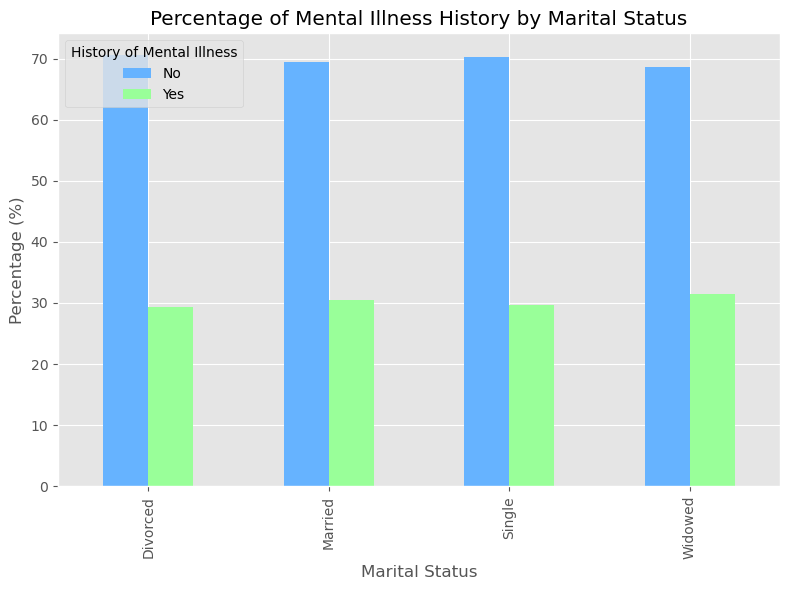

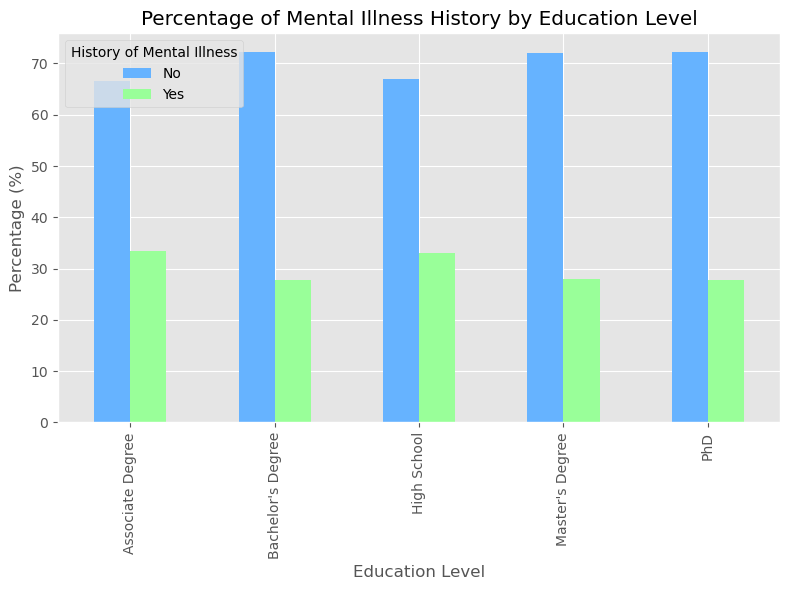

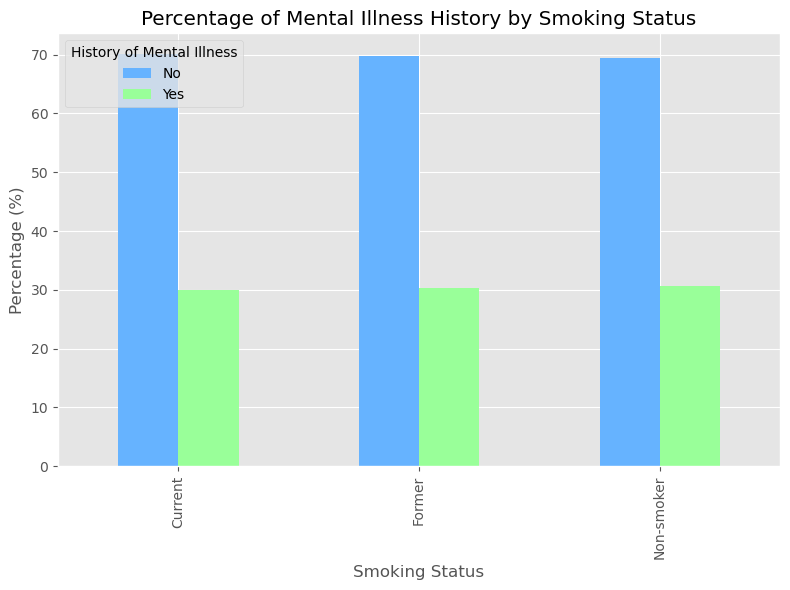

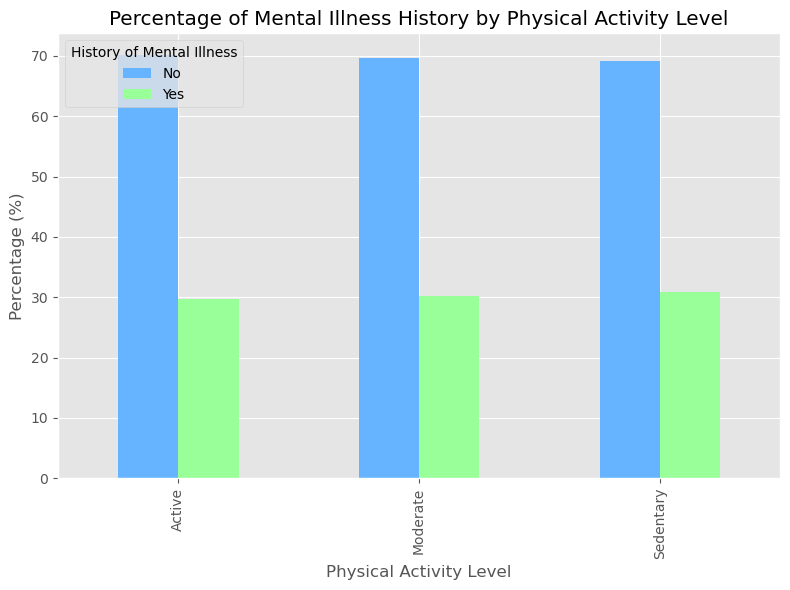

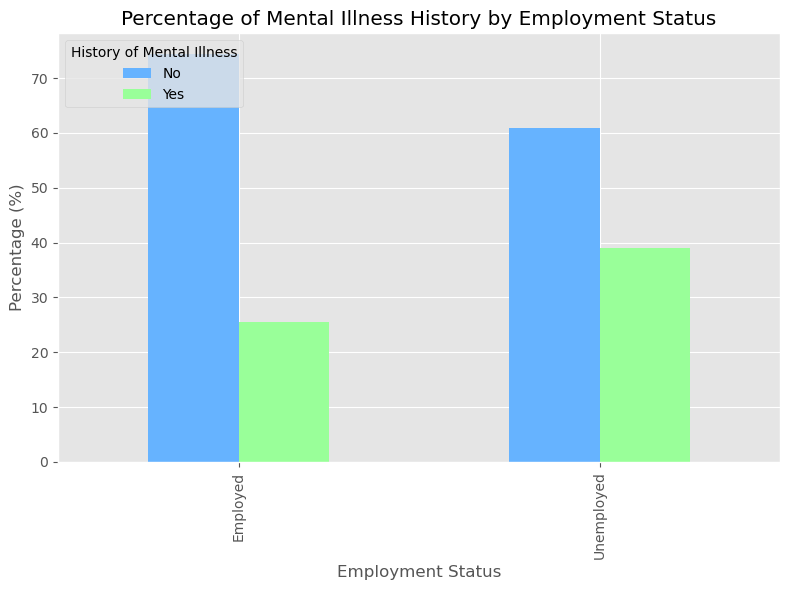

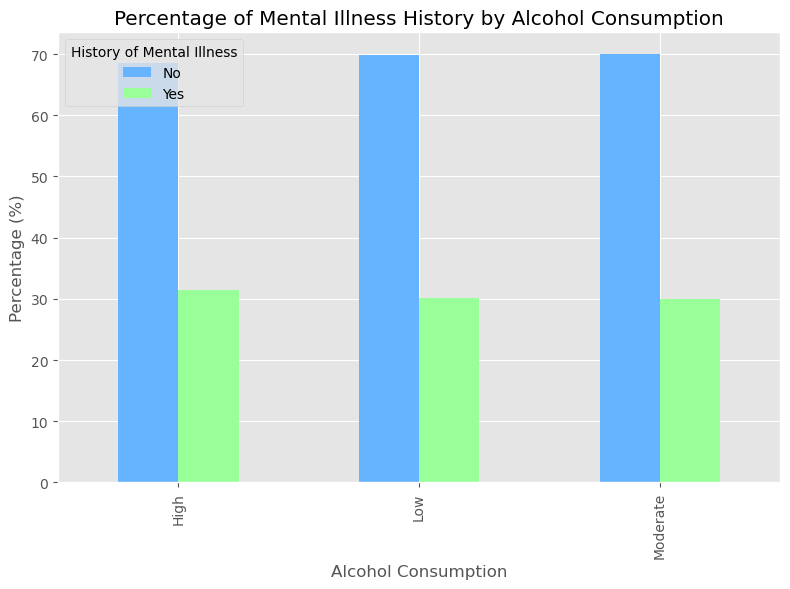

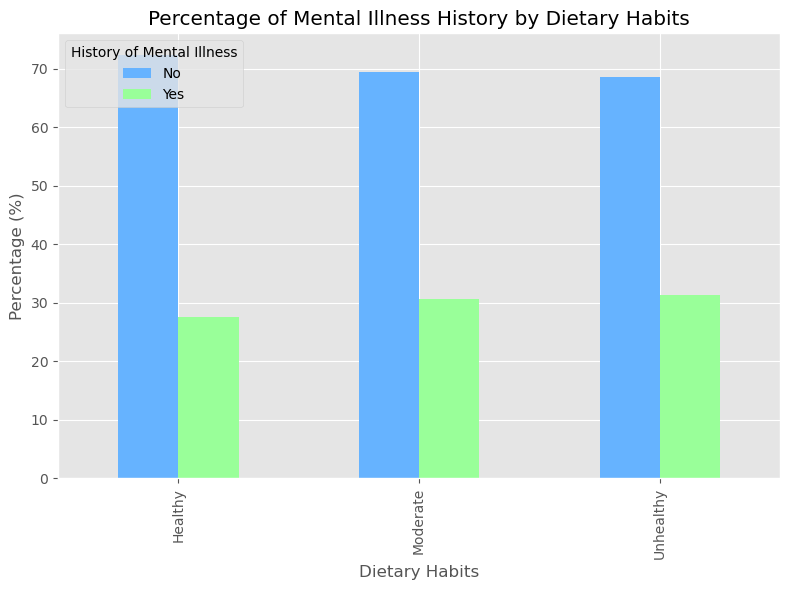

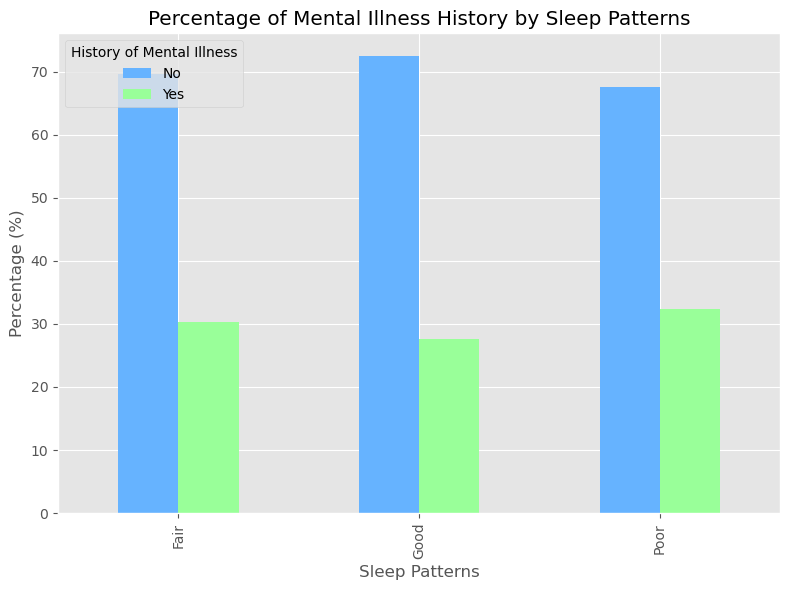

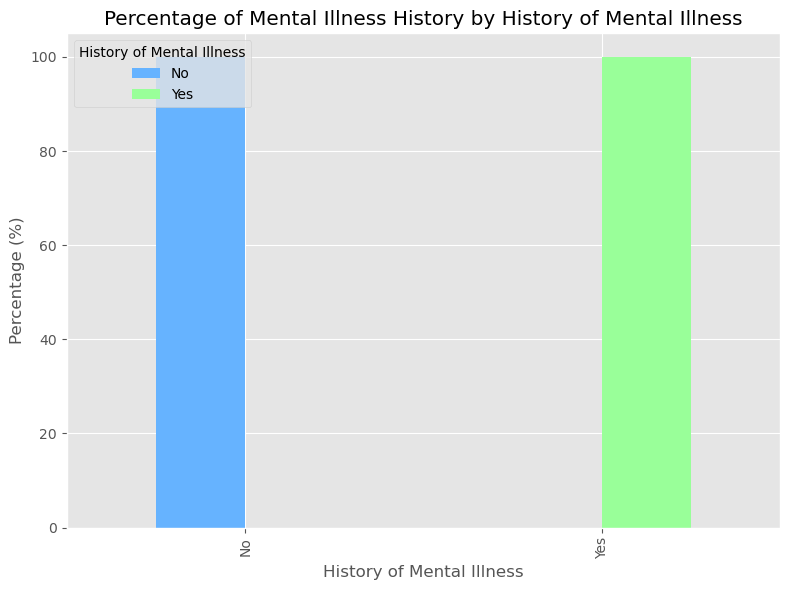

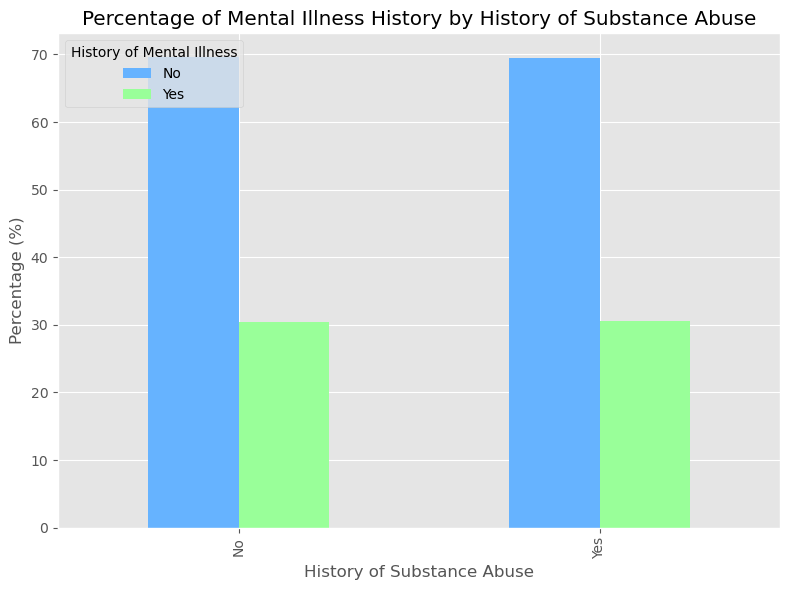

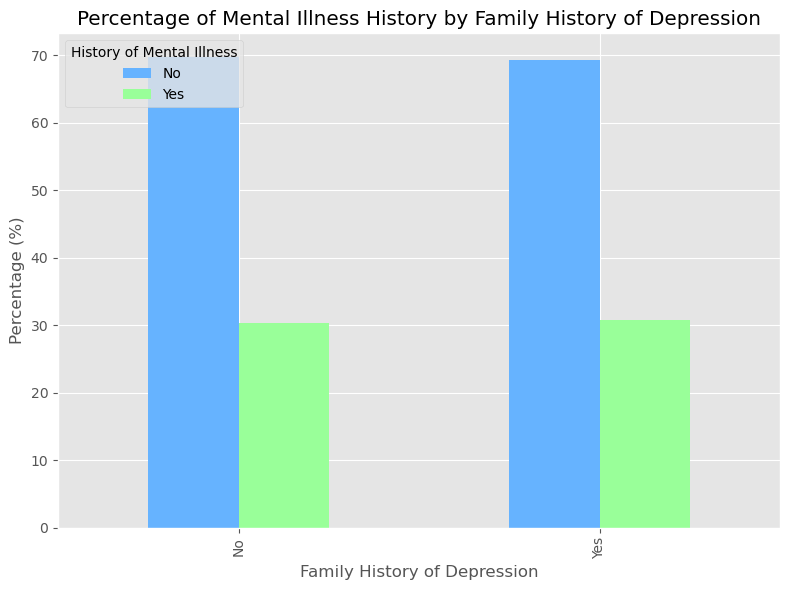

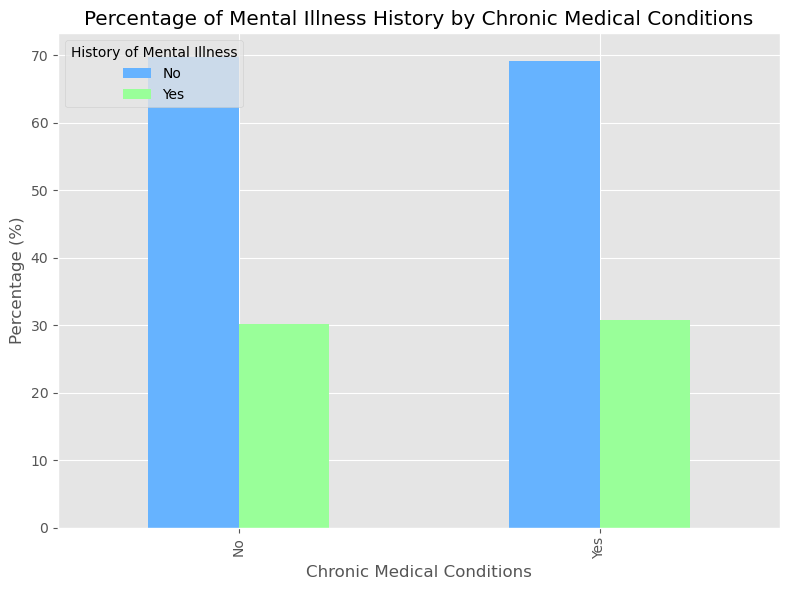

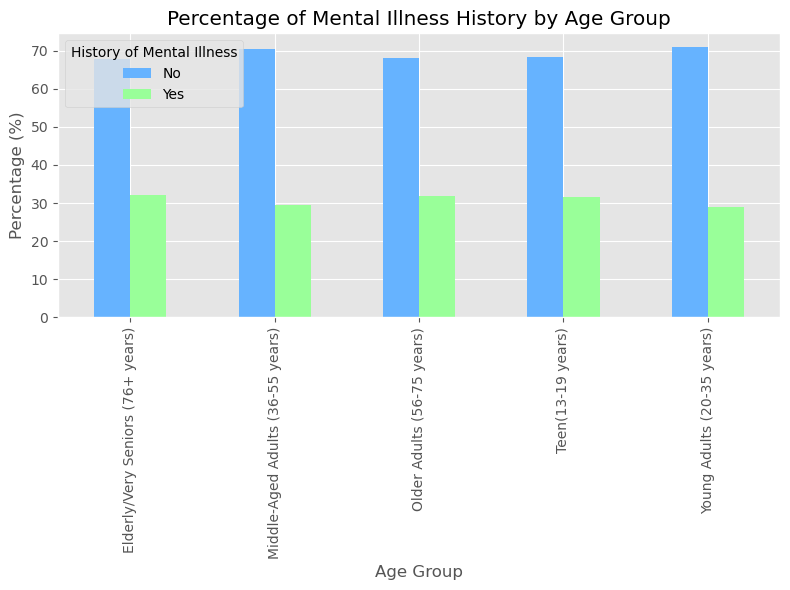

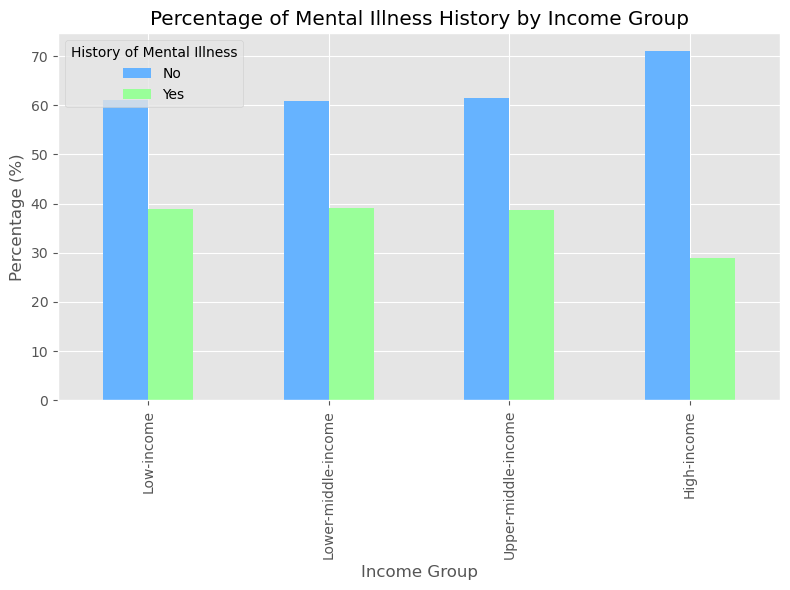

In [18]:
def plot_categorical_percentage(MH_Data, categorical_cols):
    
    # Loop through pairs of categorical columns
    for col in categorical_cols:
        # Group by the categorical column and the 'History of Mental Illness' (or other target column)
        category_percent = MH_Data.groupby([col, 'History of Mental Illness']).size().unstack(fill_value=0)
        
        # Normalize to get percentage
        category_percent = category_percent.div(category_percent.sum(axis=1), axis=0) * 100
        
        # Plot the bar chart for each column
        ax = category_percent.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#66b3ff', '#99ff99'])
        
        ax.set_ylabel('Percentage (%)')
        ax.set_title(f'Percentage of Mental Illness History by {col}')
        ax.set_xlabel(col)
        ax.legend(title='History of Mental Illness', loc='upper left', labels=['No', 'Yes'])

        # Display the plot
        plt.tight_layout()
        plt.show()

# Example usage:
plot_categorical_percentage(MH_Data, categorical_cols)


# Summary:
- No correlation between age, marital status, smoking, physical activity, or history of substance abuse and depression.
- Unemployment plays a significant role in the likelihood of having depression, with unemployed individuals being more prone to mental illness.
- Moderate and unhealthy dietary habits and poor sleep patterns are strongly associated with higher depression levels.
- High alcohol consumption and lower education levels show a slight increase in depression, but the relationships are not as significant.
- High-income individuals tend to have lower depression rates.
- Middle-aged and young adults show lower rates of depression compared to older adults.

These findings suggest that employment status, dietary habits, and sleep patterns are more strongly associated with depression in this dataset, while socioeconomic status (e.g., income) and unemployment are also key factors influencing mental illness. Further research and more detailed analysis would be needed to confirm some of these associations.

In [19]:
MH_Data = MH_Data.drop(['Age','Income','Number of Children','Marital Status'], axis = 1)

In [20]:
MH_Data.head()

,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Group,Income Group
0,Bachelor's Degree,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes,Young Adults (20-35 years),High-income
1,High School,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes,Middle-Aged Adults (36-55 years),High-income
2,Master's Degree,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No,Elderly/Very Seniors (76+ years),High-income
3,Master's Degree,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No,Older Adults (56-75 years),Upper-middle-income
4,High School,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes,Teen(13-19 years),Upper-middle-income


In [21]:
# Custom mapping for categorical columns
education_level_map = {"High School": 0, "Associate Degree": 1, "Bachelor's Degree": 2, "Master's Degree": 3, 'PhD': 4}
smoking_status_map = {'Non-smoker': 0, 'Former': 1, 'Current': 2}
physical_activity_map = {'Sedentary': 0, 'Moderate': 1, 'Active': 2}
employment_status_map = {'Employed': 0, 'Unemployed': 1}
alcohol_consumption_map = {'Low': 0, 'Moderate': 1, 'High': 2}
dietary_habits_map = {'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2}
sleep_patterns_map = {'Good': 0, 'Fair': 1, 'Poor': 2}
boolean_map = {'No': 0, 'Yes': 1}
age_group_map = {
    'Teen(13-19 years)': 0,
    'Young Adults (20-35 years)': 1,
    'Middle-Aged Adults (36-55 years)': 2,
    'Older Adults (56-75 years)': 3,
    'Elderly/Very Seniors (76+ years)': 4
}
income_group_map = {
    'Low-income': 0,
    'Lower-middle-income': 1,
    'Upper-middle-income': 2,
    'High-income': 3
}


# Apply mappings to DataFrame
MH_Data['Education Level'] = MH_Data['Education Level'].map(education_level_map)
MH_Data['Smoking Status'] = MH_Data['Smoking Status'].map(smoking_status_map)
MH_Data['Physical Activity Level'] = MH_Data['Physical Activity Level'].map(physical_activity_map)
MH_Data['Employment Status'] = MH_Data['Employment Status'].map(employment_status_map)
MH_Data['Alcohol Consumption'] = MH_Data['Alcohol Consumption'].map(alcohol_consumption_map)
MH_Data['Dietary Habits'] = MH_Data['Dietary Habits'].map(dietary_habits_map)
MH_Data['Sleep Patterns'] = MH_Data['Sleep Patterns'].map(sleep_patterns_map)
MH_Data['History of Mental Illness'] = MH_Data['History of Mental Illness'].map(boolean_map)
MH_Data['History of Substance Abuse'] = MH_Data['History of Substance Abuse'].map(boolean_map)
MH_Data['Family History of Depression'] = MH_Data['Family History of Depression'].map(boolean_map)
MH_Data['Chronic Medical Conditions'] = MH_Data['Chronic Medical Conditions'].map(boolean_map)
MH_Data['Age Group'] =MH_Data['Age Group'].map(age_group_map)
MH_Data['Income Group'] = MH_Data['Income Group'].map(income_group_map)



In [22]:
MH_Data.head()

,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Group,Income Group
0,2,0,2,1,1,1,1,1,0,1,1,1,3
1,0,0,0,0,2,2,1,1,0,0,1,2,3
2,3,0,0,0,0,2,0,0,0,1,0,4,3
3,3,0,1,1,1,1,2,0,0,0,0,3,2
4,0,0,0,1,0,1,1,1,0,1,1,0,2


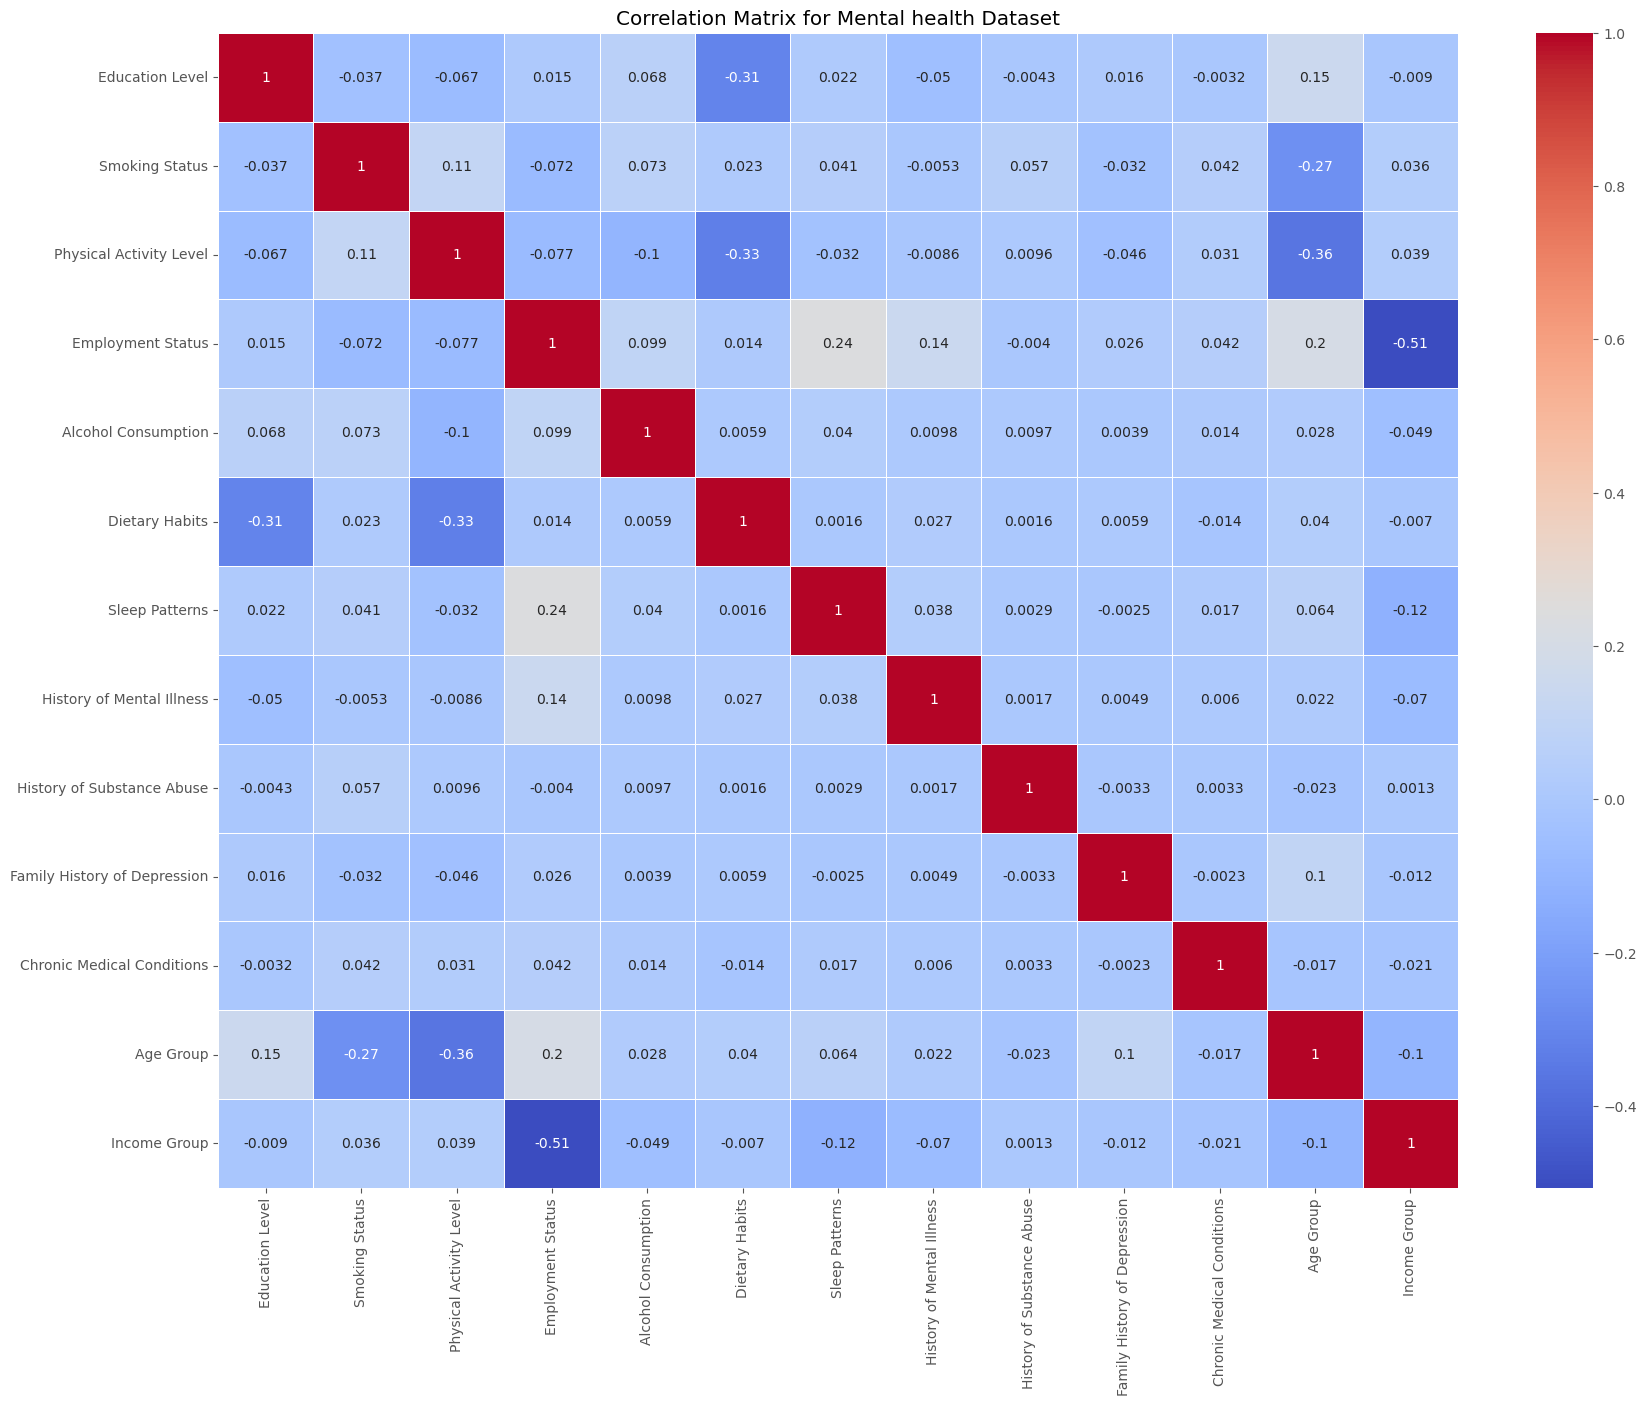

In [23]:
correlation_matrix = MH_Data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Mental health Dataset')
plt.show()

In [24]:
X = MH_Data.drop('History of Mental Illness', axis=1) 
y = MH_Data['History of Mental Illness'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Confusion Matrix:\n", conf_matrix)
print("Logistic Regression Classification Report:\n", class_report)

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Classification Report:\n", rf_class_report)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(y.value_counts()[0] / y.value_counts()[1]), random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_class_report = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)
print("XGBoost Classification Report:\n", xgb_class_report)


Logistic Regression Accuracy: 0.6157124328330554
Logistic Regression Confusion Matrix:
 [[59198 27185]
 [20517 17231]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71     86383
           1       0.39      0.46      0.42     37748

    accuracy                           0.62    124131
   macro avg       0.57      0.57      0.57    124131
weighted avg       0.63      0.62      0.62    124131

Random Forest Accuracy: 0.5790414964835536
Random Forest Confusion Matrix:
 [[55872 30511]
 [21743 16005]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68     86383
           1       0.34      0.42      0.38     37748

    accuracy                           0.58    124131
   macro avg       0.53      0.54      0.53    124131
weighted avg       0.61      0.58      0.59    124131

XGBoost Accuracy: 0.5679725451337699
X

Based on our predictions, we discovered that the current model struggles to robustly predict the depression class. To address this, we should enhance our feature engineering to include additional features that contribute more effectively to predicting the target variable. Additionally, we should implement a Random Forest model to improve prediction accuracy and better capture complex relationships within the data.